# Proportion of Loans that end in Default by US State

Data from the [Lending Club](https://www.kaggle.com/wendykan/lending-club-loan-data).

<b>Final map [here](http://jsfiddle.net/jessicayung/p381avf1/2/)</b>.

Written on 2 Sept 2016 by Jessica Yung

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import data
df = pd.read_csv("kaggle-data/lending-club-loans/loan.csv")

/Users/jessica/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Feature Engineering


In [5]:
is_default_dict = {'Default': 1,
                   'Does not meet the credit policy. Status:Charged Off': 1, 
                    'Charged Off': 1,
                    'In Grace Period': 0, 
                    'Does not meet the credit policy. Status:Fully Paid': 0, 
                    'Issued': 0, 
                    'Late (16-30 days)': 0, 
                    'Late (31-120 days)': 0,
                    'Current': 0, 
                    'Fully Paid': 0}

def is_default():
    df['is_default'] = 0
    df['is_default'] = df['loan_status'].map(is_default_dict).astype(int)
is_default()

In [6]:
is_loan_ended_dict = {'Default': 1,
                      'Does not meet the credit policy. Status:Charged Off': 1, 
                    'Charged Off': 1,
                    'In Grace Period': 0, 
                    'Does not meet the credit policy. Status:Fully Paid': 1, 
                    'Issued': 0, 
                    'Late (16-30 days)': 0, 
                    'Late (31-120 days)': 0,
                    'Current': 0, 
                    'Fully Paid': 1}

def is_loan_ended():
    df['is_loan_ended'] = 0
    df['is_loan_ended'] = df['loan_status'].map(is_loan_ended_dict)
is_loan_ended()

# Exploratory Plots

Proportion of loans that ended in default 0.1838101650586326


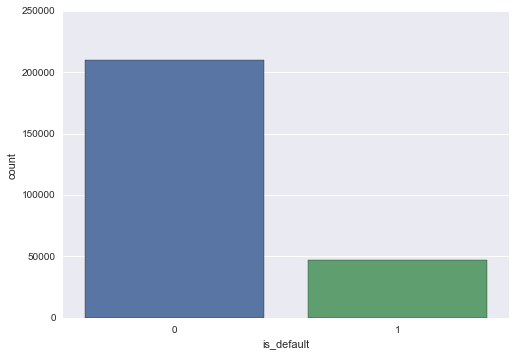

In [23]:
ended_loans = df[df['is_loan_ended'] == True]
sns.countplot(x="is_default", data=ended_loans)
print("Proportion of loans that ended in default", np.mean(ended_loans['is_default']))

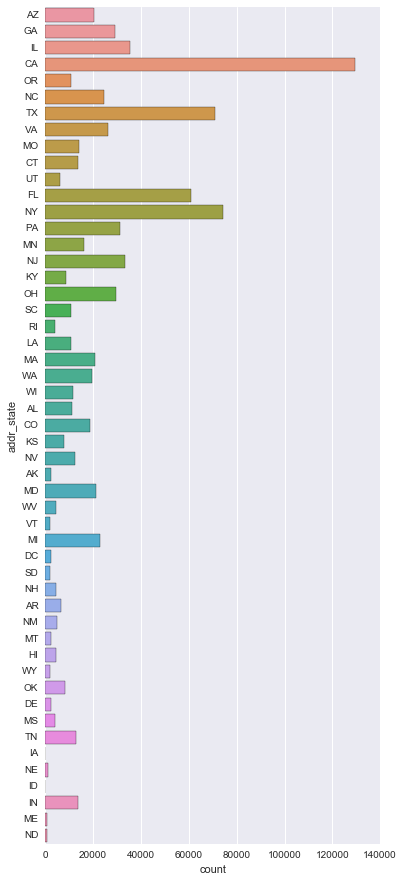

In [24]:
# Total number of loans taken out per state
plt.subplots(figsize=(6, 15))
sns.countplot(y="addr_state", data=df)

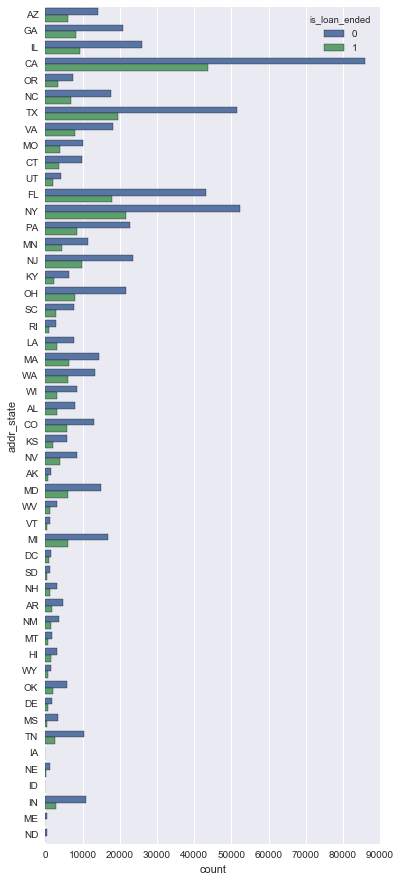

In [22]:
# Loans taken out per state: Ended vs not
plt.subplots(figsize=(6, 15))
sns.countplot(y="addr_state", hue="is_loan_ended",data=df)

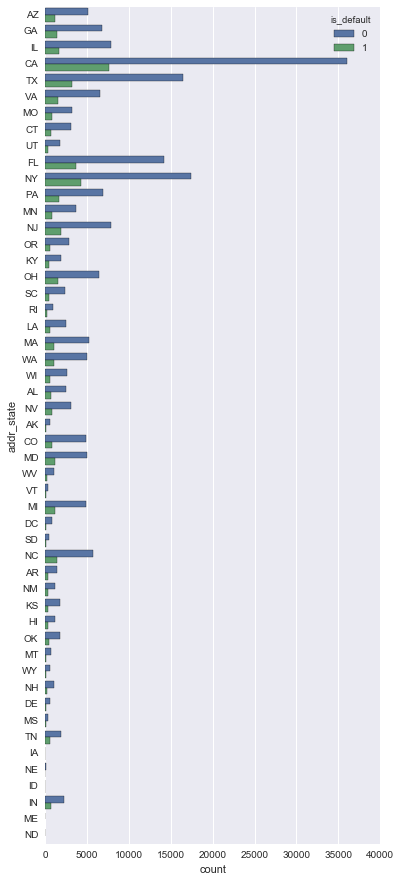

In [25]:
# Ended loans that ended in default vs not per state
plt.subplots(figsize=(6, 15))
sns.countplot(y="addr_state", hue="is_default",data=ended_loans)

# Final Plot Idea and Implementation
How about we plot the <b>proportion of loans that end in default from each state</b> to see if there is any relationship between the two?

<pre>
Proportion of people who borrow who default from each state = number of loans that ended in default (per state) / number of loans that ended (per state)
</pre>


In [29]:
total_ended_loans_by_state = {}
for i in addr_states:
    total_ended_loans_by_state[i] = len(df[(df["addr_state"] == i) 
                                           & df["is_loan_ended"] == True])
total_ended_loans_by_state

{'AK': 670,
 'AL': 3188,
 'AR': 1777,
 'AZ': 6167,
 'CA': 43645,
 'CO': 5703,
 'CT': 3751,
 'DC': 849,
 'DE': 694,
 'FL': 17872,
 'GA': 8154,
 'HI': 1493,
 'IA': 13,
 'ID': 9,
 'IL': 9428,
 'IN': 2829,
 'KS': 2114,
 'KY': 2315,
 'LA': 2995,
 'MA': 6262,
 'MD': 6100,
 'ME': 13,
 'MI': 6102,
 'MN': 4516,
 'MO': 4049,
 'MS': 432,
 'MT': 753,
 'NC': 6993,
 'ND': 8,
 'NE': 44,
 'NH': 1167,
 'NJ': 9783,
 'NM': 1400,
 'NV': 3865,
 'NY': 21692,
 'OH': 7881,
 'OK': 2156,
 'OR': 3378,
 'PA': 8570,
 'RI': 1101,
 'SC': 2850,
 'SD': 548,
 'TN': 2463,
 'TX': 19635,
 'UT': 2139,
 'VA': 8050,
 'VT': 432,
 'WA': 5983,
 'WI': 3148,
 'WV': 1153,
 'WY': 607}

In [27]:
defaulted_ended_loans_by_state = {}
for i in set(df["addr_state"].values):
    defaulted_ended_loans_by_state[i] = len(df[(df["addr_state"] == i) 
                                           & (df["is_loan_ended"] == True) 
                                           & (df["is_default"] == True)])

defaulted_ended_loans_by_state

{'AK': 99,
 'AL': 679,
 'AR': 351,
 'AZ': 1106,
 'CA': 7644,
 'CO': 822,
 'CT': 634,
 'DC': 91,
 'DE': 130,
 'FL': 3691,
 'GA': 1431,
 'HI': 286,
 'IA': 3,
 'ID': 1,
 'IL': 1606,
 'IN': 652,
 'KS': 366,
 'KY': 461,
 'LA': 589,
 'MA': 1070,
 'MD': 1146,
 'ME': 0,
 'MI': 1201,
 'MN': 834,
 'MO': 823,
 'MS': 94,
 'MT': 107,
 'NC': 1351,
 'ND': 0,
 'NE': 7,
 'NH': 162,
 'NJ': 1916,
 'NM': 280,
 'NV': 846,
 'NY': 4287,
 'OH': 1530,
 'OK': 432,
 'OR': 558,
 'PA': 1639,
 'RI': 198,
 'SC': 468,
 'SD': 92,
 'TN': 589,
 'TX': 3201,
 'UT': 362,
 'VA': 1483,
 'VT': 72,
 'WA': 1024,
 'WI': 564,
 'WV': 167,
 'WY': 83}

In [30]:
proportion_ended_defaulted_by_state = {}
for i in addr_states:
    proportion_ended_defaulted_by_state[i] = defaulted_ended_loans_by_state[i] / total_ended_loans_by_state[i]
proportion_ended_defaulted_by_state

{'AK': 0.14776119402985075,
 'AL': 0.2129861982434128,
 'AR': 0.19752391671356218,
 'AZ': 0.1793416572077185,
 'CA': 0.17514033680834,
 'CO': 0.14413466596528143,
 'CT': 0.1690215942415356,
 'DC': 0.1071849234393404,
 'DE': 0.1873198847262248,
 'FL': 0.20652417188898836,
 'GA': 0.17549668874172186,
 'HI': 0.19156061620897522,
 'IA': 0.23076923076923078,
 'ID': 0.1111111111111111,
 'IL': 0.17034365719134492,
 'IN': 0.2304701307882644,
 'KS': 0.17313150425733206,
 'KY': 0.19913606911447085,
 'LA': 0.196661101836394,
 'MA': 0.17087192590226766,
 'MD': 0.18786885245901638,
 'ME': 0.0,
 'MI': 0.19682071451982958,
 'MN': 0.18467670504871567,
 'MO': 0.20326006421338602,
 'MS': 0.2175925925925926,
 'MT': 0.14209827357237717,
 'NC': 0.1931931931931932,
 'ND': 0.0,
 'NE': 0.1590909090909091,
 'NH': 0.13881748071979436,
 'NJ': 0.19584994378002657,
 'NM': 0.2,
 'NV': 0.21888745148771022,
 'NY': 0.1976304628434446,
 'OH': 0.1941377997716026,
 'OK': 0.20037105751391465,
 'OR': 0.16518650088809947,
 

Now we can plot this data on a [<b>map</b>](http://jsfiddle.net/jessicayung/p381avf1/2/).